In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
x = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, stratify=y)

In [53]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4369, 50), (1093, 50), (4369,), (1093,))

# Training Machine Learning Model 

In [7]:
from sklearn.svm import SVC

In [54]:
model = SVC(C = 1, kernel='rbf', gamma=.03, probability = True)

In [55]:
model.fit(x_train,y_train) 

SVC(C=1, gamma=0.03, probability=True)

In [56]:
model.score(x_train, y_train)

0.953307392996109

In [57]:
model.score(x_test,y_test)

0.817932296431839

In [58]:
import pickle
with open('./data/svc_model.pickle','wb') as f:
    pickle.dump(model,f)

# Model Evaluation
- confusion matrix
- classification report
- kappa score
- ROC and AUC (probability)


In [59]:
from sklearn import metrics

In [69]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

In [71]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[ 330,  112,  442],
       [  87,  564,  651],
       [ 417,  676, 1093]], dtype=int64)

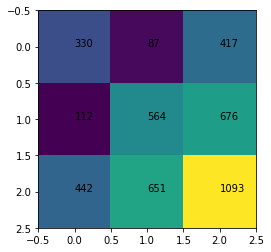

In [74]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])

In [76]:
# Classification Report
cr = metrics.classification_report(y_test, y_pred, target_names=['male', 'female'], output_dict= True)

In [77]:
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.791367,0.746606,0.768335,442.000000
female,0.834320,0.866359,0.850038,651.000000
accuracy,0.817932,0.817932,0.817932,0.817932
macro avg,0.812843,0.806483,0.809186,1093.000000
weighted avg,0.816950,0.817932,0.816998,1093.000000


In [79]:
#Kappa Score
kappa = metrics.cohen_kappa_score(y_test, y_pred)
kappa

0.6185820828781308

#  ROC and AUC

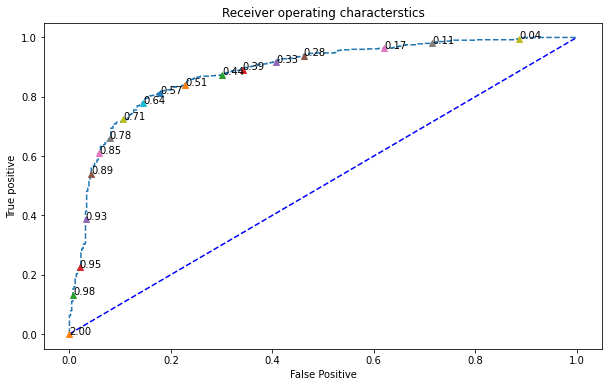

In [86]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:, 1])
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'b--')
for i in range(0, len(thresh), 20):
    plt.plot(fpr[i],tpr[i], '^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
plt.xlabel("False Positive")
plt.ylabel("True positive")
plt.title("Receiver operating characterstics")
plt.show()

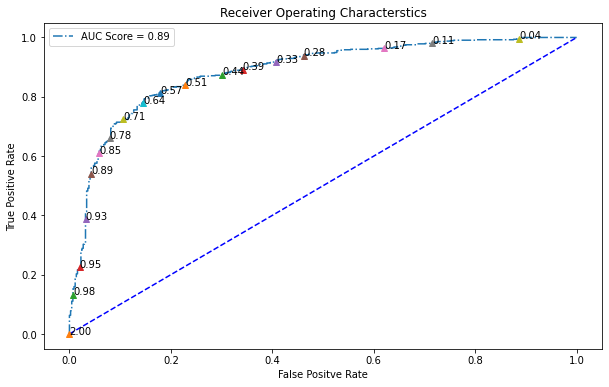

In [87]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

# Hyper Parameter Tuning

In [102]:
modul_tune = SVC()

In [103]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {'C':[1,10,20,30,40,50,100], 'kernel' : ['rbf','poly'],
             'gamma' : [0.1, 0.3, 0.05, 0.01, 0.001, 0.002, 0.006],
              'coef0' : [0,1]
             }

In [113]:
model_grid = GridSearchCV(modul_tune, param_grid, scoring='accuracy', cv=5, verbose = 2)

In [114]:
model_grid.fit(x,y)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=0, gamma=0.1, kernel=poly, total=   1.2s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=0, gamma=0.1, kernel=poly, total=   1.1s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=0, gamma=0.1, kernel=poly, total=   1.2s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] .

[CV] ........... C=1, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=1, coef0=0, gamma=0.006, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.006, kernel=rbf, total=   1.0s
[CV] C=1, coef0=0, gamma=0.006, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.006, kernel=rbf, total=   0.9s
[CV] C=1, coef0=0, gamma=0.006, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.006, kernel=rbf, total=   0.9s
[CV] C=1, coef0=0, gamma=0.006, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.006, kernel=rbf, total=   0.9s
[CV] C=1, coef0=0, gamma=0.006, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.006, kernel=rbf, total=   1.0s
[CV] C=1, coef0=0, gamma=0.006, kernel=poly ..........................
[CV] ........... C=1, coef0=0, gamma=0.006, kernel=poly, total=   1.0s
[CV] C=1, coef0=0, gamma=0.006, kernel=poly ..........................
[CV] .

[CV] ........... C=1, coef0=1, gamma=0.001, kernel=poly, total=   0.8s
[CV] C=1, coef0=1, gamma=0.001, kernel=poly ..........................
[CV] ........... C=1, coef0=1, gamma=0.001, kernel=poly, total=   0.8s
[CV] C=1, coef0=1, gamma=0.001, kernel=poly ..........................
[CV] ........... C=1, coef0=1, gamma=0.001, kernel=poly, total=   0.8s
[CV] C=1, coef0=1, gamma=0.002, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.002, kernel=rbf, total=   1.0s
[CV] C=1, coef0=1, gamma=0.002, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.002, kernel=rbf, total=   1.0s
[CV] C=1, coef0=1, gamma=0.002, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.002, kernel=rbf, total=   1.0s
[CV] C=1, coef0=1, gamma=0.002, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.002, kernel=rbf, total=   1.0s
[CV] C=1, coef0=1, gamma=0.002, kernel=rbf ...........................
[CV] .

[CV] ........... C=10, coef0=0, gamma=0.01, kernel=poly, total=   1.0s
[CV] C=10, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] ........... C=10, coef0=0, gamma=0.01, kernel=poly, total=   1.0s
[CV] C=10, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] ........... C=10, coef0=0, gamma=0.01, kernel=poly, total=   0.9s
[CV] C=10, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] ........... C=10, coef0=0, gamma=0.01, kernel=poly, total=   1.0s
[CV] C=10, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] ........... C=10, coef0=0, gamma=0.01, kernel=poly, total=   1.0s
[CV] C=10, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=10, coef0=0, gamma=0.001, kernel=rbf, total=   1.0s
[CV] C=10, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=10, coef0=0, gamma=0.001, kernel=rbf, total=   0.9s
[CV] C=10, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] .

[CV] ............ C=10, coef0=1, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=10, coef0=1, gamma=0.05, kernel=rbf ...........................
[CV] ............ C=10, coef0=1, gamma=0.05, kernel=rbf, total=   1.3s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.8s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.8s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.8s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.7s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.7s
[CV] C=10, coef0=1, gamma=0.01, kernel=rbf ...........................
[CV] .

[CV] ............. C=20, coef0=0, gamma=0.3, kernel=rbf, total=   1.3s
[CV] C=20, coef0=0, gamma=0.3, kernel=rbf ............................
[CV] ............. C=20, coef0=0, gamma=0.3, kernel=rbf, total=   1.4s
[CV] C=20, coef0=0, gamma=0.3, kernel=rbf ............................
[CV] ............. C=20, coef0=0, gamma=0.3, kernel=rbf, total=   1.4s
[CV] C=20, coef0=0, gamma=0.3, kernel=rbf ............................
[CV] ............. C=20, coef0=0, gamma=0.3, kernel=rbf, total=   1.3s
[CV] C=20, coef0=0, gamma=0.3, kernel=poly ...........................
[CV] ............ C=20, coef0=0, gamma=0.3, kernel=poly, total=   1.1s
[CV] C=20, coef0=0, gamma=0.3, kernel=poly ...........................
[CV] ............ C=20, coef0=0, gamma=0.3, kernel=poly, total=   1.3s
[CV] C=20, coef0=0, gamma=0.3, kernel=poly ...........................
[CV] ............ C=20, coef0=0, gamma=0.3, kernel=poly, total=   1.1s
[CV] C=20, coef0=0, gamma=0.3, kernel=poly ...........................
[CV] .

[CV] .......... C=20, coef0=0, gamma=0.006, kernel=poly, total=   1.0s
[CV] C=20, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] ............. C=20, coef0=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=20, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] ............. C=20, coef0=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=20, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] ............. C=20, coef0=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=20, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] ............. C=20, coef0=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=20, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] ............. C=20, coef0=1, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=20, coef0=1, gamma=0.1, kernel=poly ...........................
[CV] ............ C=20, coef0=1, gamma=0.1, kernel=poly, total=   0.9s
[CV] C=20, coef0=1, gamma=0.1, kernel=poly ...........................
[CV] .

[CV] .......... C=20, coef0=1, gamma=0.002, kernel=poly, total=   0.9s
[CV] C=20, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.002, kernel=poly, total=   0.9s
[CV] C=20, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.002, kernel=poly, total=   0.9s
[CV] C=20, coef0=1, gamma=0.006, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.006, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.006, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.006, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.006, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.006, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.006, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.006, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.006, kernel=rbf ..........................
[CV] .

[CV] .......... C=30, coef0=0, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=poly .........................
[CV] .......... C=30, coef0=0, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=poly .........................
[CV] .......... C=30, coef0=0, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=poly .........................
[CV] .......... C=30, coef0=0, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=poly .........................
[CV] .......... C=30, coef0=0, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.002, kernel=rbf, total=   1.1s
[CV] C=30, coef0=0, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.002, kernel=rbf, total=   1.1s
[CV] C=30, coef0=0, gamma=0.002, kernel=rbf ..........................
[CV] .

[CV] ............ C=30, coef0=1, gamma=0.01, kernel=rbf, total=   1.2s
[CV] C=30, coef0=1, gamma=0.01, kernel=rbf ...........................
[CV] ............ C=30, coef0=1, gamma=0.01, kernel=rbf, total=   1.2s
[CV] C=30, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=30, coef0=1, gamma=0.01, kernel=poly, total=   1.4s
[CV] C=30, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=30, coef0=1, gamma=0.01, kernel=poly, total=   1.3s
[CV] C=30, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=30, coef0=1, gamma=0.01, kernel=poly, total=   1.4s
[CV] C=30, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=30, coef0=1, gamma=0.01, kernel=poly, total=   1.3s
[CV] C=30, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=30, coef0=1, gamma=0.01, kernel=poly, total=   1.3s
[CV] C=30, coef0=1, gamma=0.001, kernel=rbf ..........................
[CV] .

[CV] ............ C=40, coef0=0, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=40, coef0=0, gamma=0.05, kernel=rbf ...........................
[CV] ............ C=40, coef0=0, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=40, coef0=0, gamma=0.05, kernel=rbf ...........................
[CV] ............ C=40, coef0=0, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=40, coef0=0, gamma=0.05, kernel=rbf ...........................
[CV] ............ C=40, coef0=0, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=40, coef0=0, gamma=0.05, kernel=poly ..........................
[CV] ........... C=40, coef0=0, gamma=0.05, kernel=poly, total=   1.1s
[CV] C=40, coef0=0, gamma=0.05, kernel=poly ..........................
[CV] ........... C=40, coef0=0, gamma=0.05, kernel=poly, total=   1.3s
[CV] C=40, coef0=0, gamma=0.05, kernel=poly ..........................
[CV] ........... C=40, coef0=0, gamma=0.05, kernel=poly, total=   1.1s
[CV] C=40, coef0=0, gamma=0.05, kernel=poly ..........................
[CV] .

[CV] ............ C=40, coef0=1, gamma=0.1, kernel=poly, total=   0.9s
[CV] C=40, coef0=1, gamma=0.3, kernel=rbf ............................
[CV] ............. C=40, coef0=1, gamma=0.3, kernel=rbf, total=   1.3s
[CV] C=40, coef0=1, gamma=0.3, kernel=rbf ............................
[CV] ............. C=40, coef0=1, gamma=0.3, kernel=rbf, total=   1.3s
[CV] C=40, coef0=1, gamma=0.3, kernel=rbf ............................
[CV] ............. C=40, coef0=1, gamma=0.3, kernel=rbf, total=   1.3s
[CV] C=40, coef0=1, gamma=0.3, kernel=rbf ............................
[CV] ............. C=40, coef0=1, gamma=0.3, kernel=rbf, total=   1.3s
[CV] C=40, coef0=1, gamma=0.3, kernel=rbf ............................
[CV] ............. C=40, coef0=1, gamma=0.3, kernel=rbf, total=   1.3s
[CV] C=40, coef0=1, gamma=0.3, kernel=poly ...........................
[CV] ............ C=40, coef0=1, gamma=0.3, kernel=poly, total=   1.1s
[CV] C=40, coef0=1, gamma=0.3, kernel=poly ...........................
[CV] .

[CV] .......... C=40, coef0=1, gamma=0.006, kernel=poly, total=   1.5s
[CV] C=40, coef0=1, gamma=0.006, kernel=poly .........................
[CV] .......... C=40, coef0=1, gamma=0.006, kernel=poly, total=   1.5s
[CV] C=40, coef0=1, gamma=0.006, kernel=poly .........................
[CV] .......... C=40, coef0=1, gamma=0.006, kernel=poly, total=   1.5s
[CV] C=50, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=50, coef0=0, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=50, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=50, coef0=0, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=50, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=50, coef0=0, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=50, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=50, coef0=0, gamma=0.1, kernel=rbf, total=   1.2s
[CV] C=50, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] .

[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.006, kernel=rbf ..........................
[CV] ........... C=50, coef0=0, gamma=0.006, kernel=rbf, total=   1.4s
[CV] C=50, coef0=0, gamma=0.006, kernel=rbf ..........................
[CV] ........... C=50, coef0=0, gamma=0.006, kernel=rbf, total=   1.4s
[CV] C=50, coef0=0, gamma=0.006, kernel=rbf ..........................
[CV] .

[CV] ........... C=50, coef0=1, gamma=0.001, kernel=rbf, total=   1.1s
[CV] C=50, coef0=1, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=50, coef0=1, gamma=0.001, kernel=rbf, total=   1.1s
[CV] C=50, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=50, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=50, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=50, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=50, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=50, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] .

[CV] ........... C=100, coef0=0, gamma=0.01, kernel=rbf, total=   1.3s
[CV] C=100, coef0=0, gamma=0.01, kernel=rbf ..........................
[CV] ........... C=100, coef0=0, gamma=0.01, kernel=rbf, total=   1.3s
[CV] C=100, coef0=0, gamma=0.01, kernel=rbf ..........................
[CV] ........... C=100, coef0=0, gamma=0.01, kernel=rbf, total=   1.3s
[CV] C=100, coef0=0, gamma=0.01, kernel=rbf ..........................
[CV] ........... C=100, coef0=0, gamma=0.01, kernel=rbf, total=   1.3s
[CV] C=100, coef0=0, gamma=0.01, kernel=poly .........................
[CV] .......... C=100, coef0=0, gamma=0.01, kernel=poly, total=   0.9s
[CV] C=100, coef0=0, gamma=0.01, kernel=poly .........................
[CV] .......... C=100, coef0=0, gamma=0.01, kernel=poly, total=   1.1s
[CV] C=100, coef0=0, gamma=0.01, kernel=poly .........................
[CV] .......... C=100, coef0=0, gamma=0.01, kernel=poly, total=   1.2s
[CV] C=100, coef0=0, gamma=0.01, kernel=poly .........................
[CV] .

[CV] ........... C=100, coef0=1, gamma=0.3, kernel=poly, total=   1.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   1.3s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   1.3s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   1.2s
[CV] C=100, coef0=1, gamma=0.05, kernel=poly .........................
[CV] .......... C=100, coef0=1, gamma=0.05, kernel=poly, total=   0.7s
[CV] C=100, coef0=1, gamma=0.05, kernel=poly .........................
[CV] .

[Parallel(n_jobs=1)]: Done 980 out of 980 | elapsed: 18.5min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.3, 0.05, 0.01, 0.001, 0.002, 0.006],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [117]:
model_grid.best_index_

4

In [118]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.05, 'kernel': 'rbf'}

In [119]:
model_grid.best_score_

0.7879881631025272

In [120]:
model_best = SVC(C=1,kernel='rbf',gamma=0.05,probability=True)

In [121]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.807868252516011

In [122]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

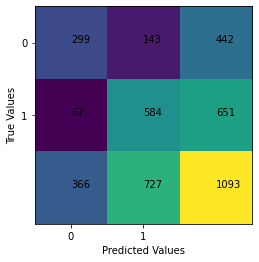

In [123]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [124]:
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.816940,0.676471,0.740099,442.000000
female,0.803301,0.897081,0.847605,651.000000
accuracy,0.807868,0.807868,0.807868,0.807868
macro avg,0.810121,0.786776,0.793852,1093.000000
weighted avg,0.808817,0.807868,0.804131,1093.000000


In [125]:
metrics.cohen_kappa_score(y_test,y_pred)

0.589832022873481

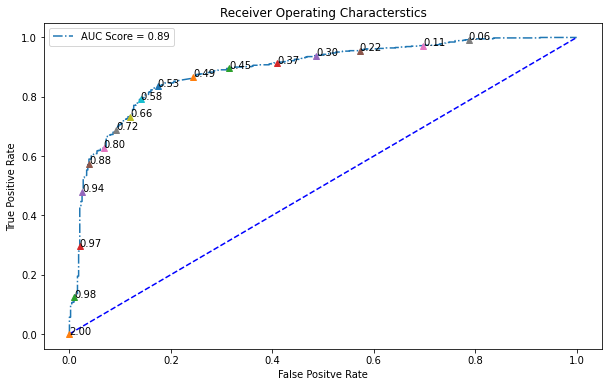

In [126]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [127]:
import pickle
pickle.dump(model_best,open('./model/model_svm.pickle','wb'))
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))